In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

Using TensorFlow backend.


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[2]])
decoded_review


"? this has to be one of the worst films of the ? when my friends i were watching this film being the ? audience it was ? at we just ? watched the first half an hour with our ? ? the ? at how bad it really was the rest of the time everyone else in the ? just started talking to each other ? or ? ? into their ? that they actually ? money they had ? working to watch this ? ? for a film it must have looked like a great idea on ? but on film it looks like no one in the film has a ? what is going on crap acting crap ? i can't get across how ? this is to watch save yourself an hour a bit of your life"

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 100,
          batch_size = 512,
          validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 [==============================] - 1s 36us/step - loss: 0.6339 - acc: 0.6773 - val_loss: 0.5475 - val_acc: 0.7845
Epoch 2/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.4775 - acc: 0.8139 - val_loss: 0.4219 - val_acc: 0.8328
Epoch 3/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.3879 - acc: 0.8444 - val_loss: 0.3782 - val_acc: 0.8432
Epoch 4/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.3489 - acc: 0.8551 - val_loss: 0.3478 - val_acc: 0.8534
Epoch 5/100
15000/15000 [==============================] - 0s 13us/step - loss: 0.3258 - acc: 0.8647 - val_loss: 0.3393 - val_acc: 0.8551
Epoch 6/100
15000/15000 [==============================] - 0s 13us/step - loss: 0.3170 - acc: 0.8689 - val_loss: 0.3451 - val_acc: 0.8554
Epoch 7/100
15000/15000 [==============================] - 0s 13us/step - loss: 0.3115 - acc: 0.8707 - val_loss: 0.3390 - 

15000/15000 [==============================] - 0s 13us/step - loss: 0.0700 - acc: 0.9758 - val_loss: 0.7681 - val_acc: 0.8235
Epoch 60/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.0603 - acc: 0.9809 - val_loss: 0.7815 - val_acc: 0.8227
Epoch 61/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.0588 - acc: 0.9810 - val_loss: 0.8309 - val_acc: 0.8230
Epoch 62/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.0584 - acc: 0.9821 - val_loss: 0.8234 - val_acc: 0.8215
Epoch 63/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.0512 - acc: 0.9851 - val_loss: 0.8354 - val_acc: 0.8192
Epoch 64/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.0471 - acc: 0.9860 - val_loss: 0.8927 - val_acc: 0.8103
Epoch 65/100
15000/15000 [==============================] - 0s 12us/step - loss: 0.0486 - acc: 0.9854 - val_loss: 0.8774 - val_acc: 0.8216
Epoch 66/100
15000/15000 [==============

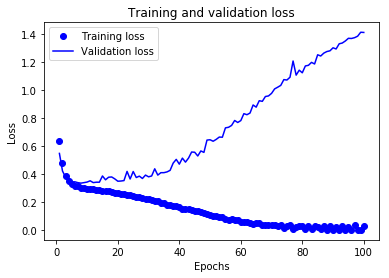

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()